In [204]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("../student_spending.csv")
data.head()

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


In [4]:
data.describe()

,Unnamed: 0,age,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,21.675000,1020.650000,504.771000,4520.395000,696.00600,252.642000,124.63700,174.761000,84.814000,60.699000,178.304000,114.310000,108.910000
std,288.819436,2.322664,293.841161,287.092575,860.657944,171.21862,86.949606,43.55799,72.404518,37.970451,22.898007,71.744441,49.591544,52.412221
min,0.000000,18.000000,501.000000,0.000000,3003.000000,401.00000,100.000000,50.00000,50.000000,20.000000,20.000000,50.000000,30.000000,20.000000
25%,249.750000,20.000000,770.750000,261.000000,3779.750000,538.75000,175.000000,88.00000,112.000000,54.000000,41.000000,114.000000,73.000000,63.750000
50%,499.500000,22.000000,1021.000000,513.000000,4547.500000,704.50000,255.000000,123.00000,175.000000,86.000000,62.000000,178.000000,115.000000,110.000000
75%,749.250000,24.000000,1288.250000,751.500000,5285.000000,837.25000,330.000000,162.25000,238.000000,116.000000,80.000000,241.000000,158.000000,153.000000
max,999.000000,25.000000,1500.000000,1000.000000,6000.000000,1000.00000,400.000000,200.00000,300.000000,150.000000,100.000000,300.000000,200.000000,200.000000


As per this mean,std and min and max shows all numerical data well distributed, doesn't contains that much outliers.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                1000 non-null   int64 
 1   age                       1000 non-null   int64 
 2   gender                    1000 non-null   object
 3   year_in_school            1000 non-null   object
 4   major                     1000 non-null   object
 5   monthly_income            1000 non-null   int64 
 6   financial_aid             1000 non-null   int64 
 7   tuition                   1000 non-null   int64 
 8   housing                   1000 non-null   int64 
 9   food                      1000 non-null   int64 
 10  transportation            1000 non-null   int64 
 11  books_supplies            1000 non-null   int64 
 12  entertainment             1000 non-null   int64 
 13  personal_care             1000 non-null   int64 
 14  technology               

There is no Null values, we can continue our Analytics.

<AxesSubplot:ylabel='gender'>

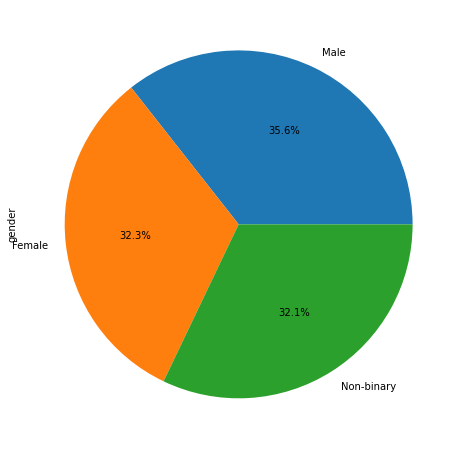

In [126]:
data['gender'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=((12,8)))

Almost all gender distributed equally.

# Total Expense of Students 

In [209]:
expense_data = data.drop(['Unnamed: 0','age','year_in_school','major','preferred_payment_method',"monthly_income","financial_aid"],axis=1)
Total_Expense = pd.DataFrame(expense_data.select_dtypes(np.number).sum(),columns=["Total_Expense"])

female_expense_data = expense_data[expense_data['gender'] == "Female"]
female_expense = pd.DataFrame(female_expense_data.select_dtypes(np.number).sum(),columns=["female_expense"])

male_expense_data = expense_data[expense_data['gender'] == "Male"]
male_expense = pd.DataFrame(male_expense_data.select_dtypes(np.number).sum(),columns=["male_expense"])

nb_expense_data = expense_data[expense_data['gender'] == "Non-binary"]
nb_expense = pd.DataFrame(nb_expense_data.select_dtypes(np.number).sum(),columns=["nb_expense"])

expense_data.head()

,gender,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous
0,Non-binary,5939,709,296,123,188,41,78,134,127,72
1,Female,4908,557,365,85,252,74,92,226,129,68
2,Non-binary,3051,666,220,137,99,130,23,239,112,133
3,Female,4935,652,289,114,223,99,30,163,105,55
4,Female,3887,825,372,168,194,48,71,88,71,104


<AxesSubplot:ylabel='nb_expense'>

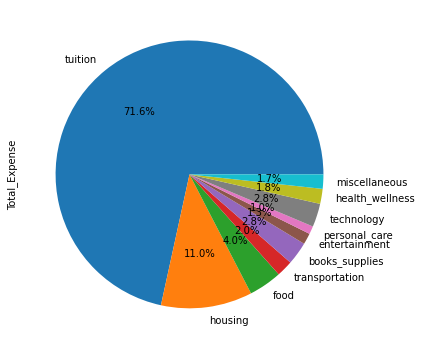

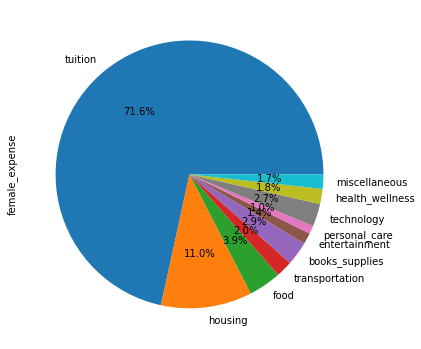

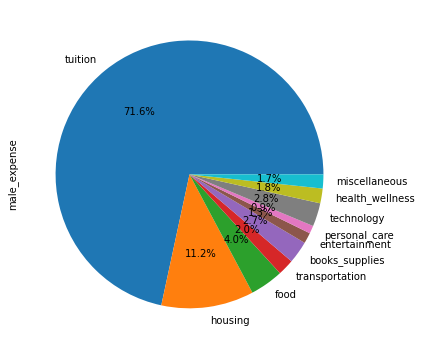

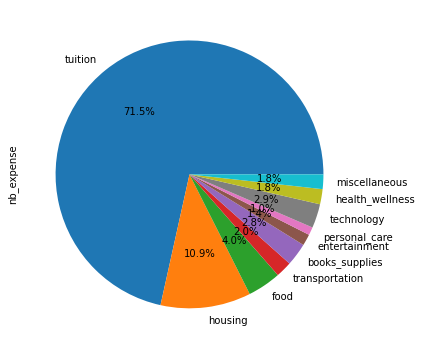

In [118]:
Total_Expense.plot.pie(y='Total_Expense', legend=False, rot=45 , autopct='%1.1f%%',figsize =(6,10),)
female_expense.plot.pie(y='female_expense', legend=False, rot=45 , autopct='%1.1f%%',figsize =(6,10),)
male_expense.plot.pie(y='male_expense', legend=False, rot=45 , autopct='%1.1f%%',figsize =(6,10),)
nb_expense.plot.pie(y='nb_expense', legend=False, rot=45 , autopct='%1.1f%%',figsize =(6,10),)

Woww, Overall students data and genderwise data also almost same replication. So Human psycology and needs tends spend same way irrespective of the gender.

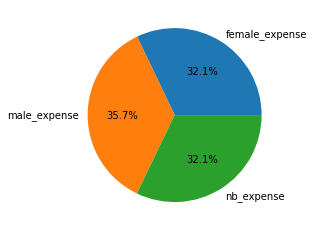

In [150]:
#total expense of the each gender
expense_ratio = {"female_expense":female_expense.sum()[0],"male_expense":male_expense.sum()[0],"nb_expense":nb_expense.sum()[0]}
plt.pie(expense_ratio.values(), labels=expense_ratio.keys(), autopct='%1.1f%%')
plt.show()

The above total expense of the each gender percentage exactly replicates gender percentages in the dataset. Statiscally this dataset is well cleaned.

# Total Savings of the Students

In [154]:
data.head()

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


In [162]:
savings = data[["gender","monthly_income","financial_aid"]]
savings.head()

,gender,monthly_income,financial_aid
0,Non-binary,958,270
1,Female,1006,875
2,Non-binary,734,928
3,Female,617,265
4,Female,810,522


<ipython-input-176-9b8634a272e5>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  Male_savings = (savings[savings["gender"]=='Male'].select_dtypes(pd.np.number).sum()).values.sum()
<ipython-input-176-9b8634a272e5>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  Female_savings = (savings[savings["gender"]=='Female'].select_dtypes(pd.np.number).sum()).values.sum()
<ipython-input-176-9b8634a272e5>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  nb_savings = (savings[savings["gender"]=='Non-binary'].select_dtypes(pd.np.number).sum()).values.sum()


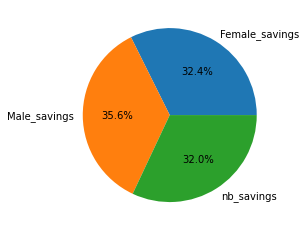

In [176]:
Male_savings = (savings[savings["gender"]=='Male'].select_dtypes(np.number).sum()).values.sum()
Female_savings = (savings[savings["gender"]=='Female'].select_dtypes(np.number).sum()).values.sum()
nb_savings = (savings[savings["gender"]=='Non-binary'].select_dtypes(np.number).sum()).values.sum()
savings_ratio = {"Female_savings":Female_savings,"Male_savings":Male_savings,"nb_savings":nb_savings}
plt.pie(savings_ratio.values(), labels=savings_ratio.keys(), autopct='%1.1f%%')
plt.show()

same here.

# Tution fare by major studing
More than 70% of the expense of the students is tution fee so we concentrate more on that area. By which Area of major taking good amount of fee.

<AxesSubplot:xlabel='major'>

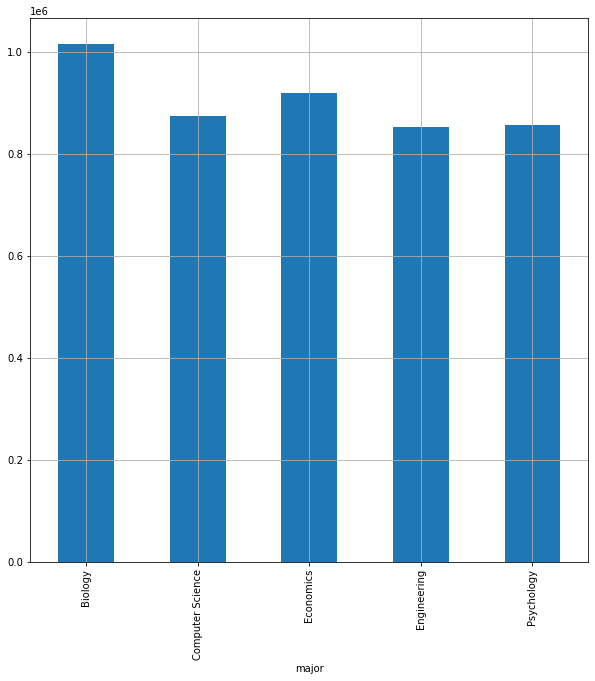

In [198]:
data.groupby('major')['tuition'].sum().plot(kind="bar",figsize =(10,10),grid =True)

Biology students spends more than **million** for tution fee.Followed by Economics more than **900K**. Rest all nearning 900K.